In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
# Funkcja do rzutowania obserwacji na kierunek a
def projection(X, A):
    Xz = (X[1] * A + X[0]) / (A**2 + 1)
#     Xz = X[0]
    Yz = A * Xz
    return np.array([Xz, Yz])

In [3]:
class1 = np.zeros((2, 30))
class2 = np.zeros((2, 30))
class3 = np.zeros((2, 30))

In [4]:
class1[0,:] = np.random.normal(loc=(-1), scale=1.0, size=(1, 30))
class1[1,:] = np.random.normal(loc=(1), scale=1.0, size=(1, 30))

In [5]:
class2[0,:] = np.random.normal(loc=(2), scale=1.0, size=(1, 30))
class2[1,:] = np.random.normal(loc=(4), scale=1.0, size=(1, 30))

In [6]:
class3[0,:] = np.random.normal(loc=(-2), scale=1.0, size=(1, 30))
class3[1,:] = np.random.normal(loc=(2), scale=1.0, size=(1, 30))


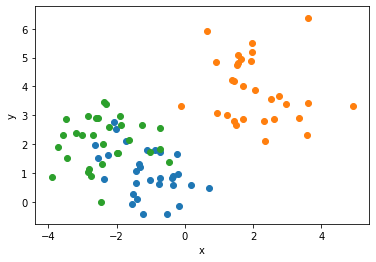

In [7]:
fig, ax = plt.subplots(); 
ax.scatter(class1[0,:], class1[1,:]);
ax.scatter(class2[0,:], class2[1,:]);
ax.scatter(class3[0,:], class3[1,:]);
ax.set_xlabel('x'); 
ax.set_ylabel('y');
plt.show()

In [8]:
S1 = np.cov(class1)
S2 = np.cov(class2)
S3 = np. cov(class3)

In [9]:
m1 = np.array([-1, 1])
m2 = np.array([2, 4])
m3 = np.array([-2, 2])

In [10]:
# Licba klas
g=3

In [11]:
# Liczba elementów klas 1 i 2 oraz całkowita liczba
n1 = 30
n2 = 30
n3 = 30
n = n1 + n2 + n3

In [12]:
# Średnia wszystkich punktów
m = np.mean(np.concatenate((class1, class2, class3), axis=1), axis=1)

In [13]:
# Macierz zmienności międzygrupowej
B = (n1*(m1 - m) * np.transpose(m1 - m) + n2*(m2 - m) * np.transpose(m2 - m) + n3*(m3 - m) * np.transpose(m3 - m))/(g-1)

In [14]:
# Wyznaczenie macierzy zmienności wewnątrzgrupowej W
W = ((n1 - 1) * S1 + (n2 - 1) * S2) + ((n3 -1) * S3)/(n - 3)

# Wyznaczenie wektora a
a  = np.linalg.inv(W) * (m2 - m1)

In [15]:
# Macierz pomocnicza
U = np.linalg.inv(W) * B

# Wyznaczenia wartosci i wektorow własnych
eig_values, eig_vectors = np.linalg.eig(U)

# Wektor własny odpowiadający maksymalnej wartości własnej
a = eig_vectors[:, np.argmax(eig_values)]

In [16]:
# Wyznaczenie współczynnika kierunkowego prostej
A = a[1] / a[0]

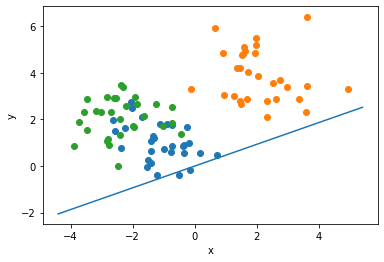

In [17]:
fig, ax = plt.subplots(); 
ax.scatter(class1[0,:], class1[1,:]);
ax.scatter(class2[0,:], class2[1,:]);
ax.scatter(class3[0,:], class3[1,:]);

x_min, x_max = ax.get_xlim()
x = [x_min, x_max]
y = [i * A for i in x]
ax.plot(x, y)
ax.set_xlabel('x'); 
ax.set_ylabel('y');
plt.show()

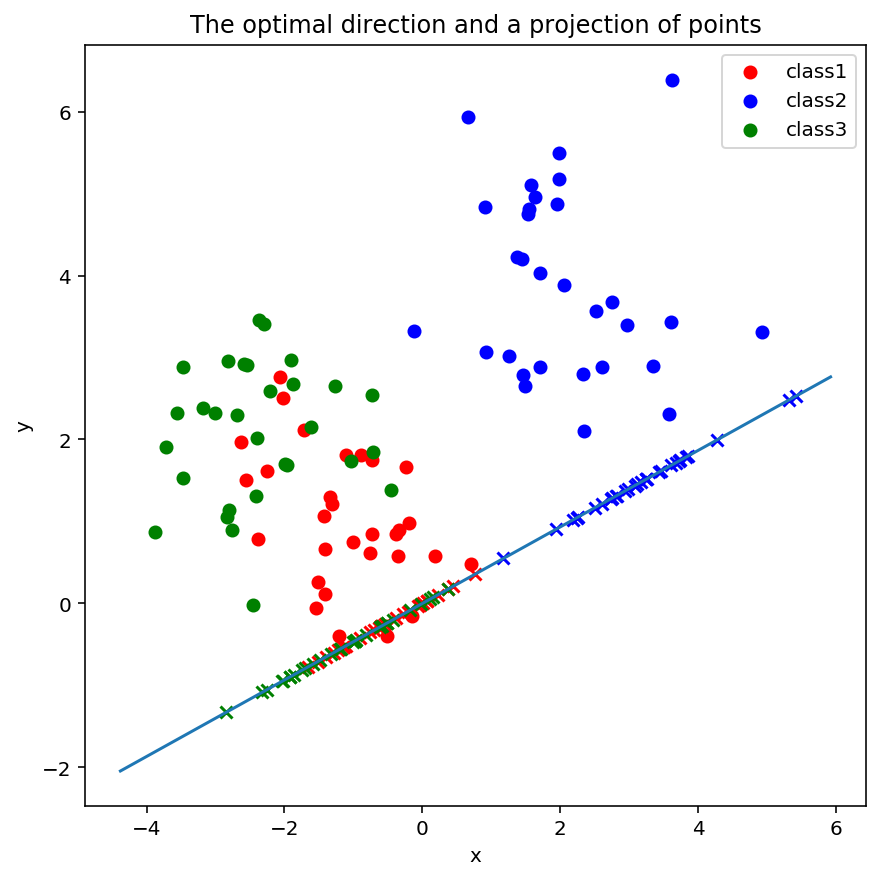

In [19]:
fig, ax = plt.subplots(dpi=144, figsize=[7, 7]);  
ax.scatter(class1[0,:], class1[1,:], label='class1', color='r');
ax.scatter(class2[0,:], class2[1,:], label='class2', color='b');
ax.scatter(class3[0,:], class3[1,:], label='class3', color='g');



proj_class1 = projection(class1, A);
proj_class2 = projection(class2, A);
proj_class3 = projection(class3, A);

ax.scatter(proj_class1[0,:], proj_class1[1,:], marker='x', color='r');
ax.scatter(proj_class2[0,:], proj_class2[1,:], marker='x', color='b');
ax.scatter(proj_class3[0,:], proj_class3[1,:], marker='x', color='g');

x_min, x_max = ax.get_xlim()
x = [x_min, x_max]
y = [i*A for i in [x_min, x_max]]
ax.plot(x, y)

ax.set_xlabel('x'); 
ax.set_ylabel('y');
ax.legend();
ax.set_title('The optimal direction and a projection of points')
plt.show()